### matplotlib: Несколько графиков [Домашнее задание]
> **Вы должны импортировать все необходимые пакеты самостоятельно.**

> **Пишите код только там, где это показано для записи. Не удаляйте комментарии!**
 

### Шаг 1

Пожалуйста, реализуйте функцию ```load_csv(filename)```, которая будет возвращать  спискок ```header``` и ```ndarray``` ```data```.

In [1]:
#Начало вашего кода
import csv
import numpy as np
import os.path
def load_csv(filename):
    csv_list=[]
    data_list=[]
    if os.path.exists("{}".format(filename)):
        with open(filename,"r") as file:
            csv_reader = csv.reader(file, delimiter=',')
            for row in csv_reader:
                csv_list.append(row)
                header=csv_list[0]
                data_list=csv_list[1:]
                data=np.array(csv_list[1:])
    return header,data
#Конец вашего кода
header,data=load_csv("Social_Network_Ads.csv")
print(header)
for elem in data.tolist()[:5]:
    print(elem)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
['15624510', 'Male', '19', '19000', '0']
['15810944', 'Male', '35', '20000', '0']
['15668575', 'Female', '26', '43000', '0']
['15603246', 'Female', '27', '57000', '0']
['15804002', 'Male', '19', '76000', '0']


### Ожидаемый результат:

```
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
['15624510', 'Male', '19', '19000', '0']
['15810944', 'Male', '35', '20000', '0']
['15668575', 'Female', '26', '43000', '0']
['15603246', 'Female', '27', '57000', '0']
['15804002', 'Male', '19', '76000', '0']
```

### Шаг 2

Пожалуйста, реализуйте функцию ```preprocess (data, idx)```, которая преобразует элементы столбца ```idx``` в числа. В конце эта функция вернет данные со всеми элементами, преобразованными в ```int```, и словарь ```num2str```, который содержит число в качестве ключа и ```str``` в качестве значения.

**Подсказка: используйте ```ndarray.copy()```, чтобы не потерять исходные данные.**

In [2]:
#Начало вашего кода
np_data=data.copy()
def preprocess (data, idx):
    dic_val={'Female':0, 'Male':1}
    data[:,1]=[dic_val[letter] for letter in data[:,idx]]
    data_int=data.astype('int')
    new_dict={}
    dict_list=list(dic_val.values())
    new_dict[dict_list[0]]='Female'
    new_dict[dict_list[1]]='Male'
    return data_int,new_dict
#Конец вашего кода
np_data,num2str=preprocess(np_data,1)
print(num2str)
print(np_data)

{0: 'Female', 1: 'Male'}
[[15624510        1       19    19000        0]
 [15810944        1       35    20000        0]
 [15668575        0       26    43000        0]
 ...
 [15654296        0       50    20000        1]
 [15755018        1       36    33000        0]
 [15594041        0       49    36000        1]]


### Ожидаемый результат:

```
{0: 'Female', 1: 'Male'}
[[15624510        1       19    19000        0]
 [15810944        1       35    20000        0]
 [15668575        0       26    43000        0]
 ...
 [15654296        0       50    20000        1]
 [15755018        1       36    33000        0]
 [15594041        0       49    36000        1]]
```

### Шаг 3

Пожалуйста, реализуйте функцию  ```statistics(data, idx)```, которая вычисляет базовую статистику для данного столбца ```idx``` в ```ndarray``` ```data```. Функция должна возвращать словарь рассчитанных значений.

In [3]:
#Начало вашего кода
def statistics(data, idx):
    stat_dic={}
    stat_dic["mean"]=np.mean(data[:,idx])
    stat_dic["std"]=np.std(data[:,idx])
    stat_dic["median"]=np.median(data[:,idx])
    stat_dic["max"]=np.max(data[:,idx])
    stat_dic["min"]=np.min(data[:,idx])
    return stat_dic
#Конец вашего кода
age_stats=statistics(np_data,2)
salary_stats=statistics(np_data,3)

print(age_stats)
print(salary_stats)

{'mean': 37.655, 'std': 10.46976480156073, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34054.3124104716, 'median': 70000.0, 'max': 150000, 'min': 15000}


### Ожидаемый результат:

```
{'mean': 37.655, 'std': 10.46976480156073, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34054.3124104716, 'median': 70000.0, 'max': 150000, 'min': 15000}
```

### Шаг 4

Постройте гистограммы (```histograms```) на основе информации о возрасте и зарплате.

Возрастная гистограмма должна содержать 6 бинов (```bins```), а гистограмма зарплаты должна содержать 9 (```bins```). Пожалуйста, используйте результаты статистики из предыдущего шага, чтобы сгенерировать равные бины.

**Подсказка:** 
* установите размер фигуры в ```(10,5)```, используя ```plt.rcParams["figure.figsize]```
* установите аргумент прозрачности ```0.6```
* Пожалуйста, поверните xticklabels на 45 градусов. ```ax[i].set_xticklabels()```





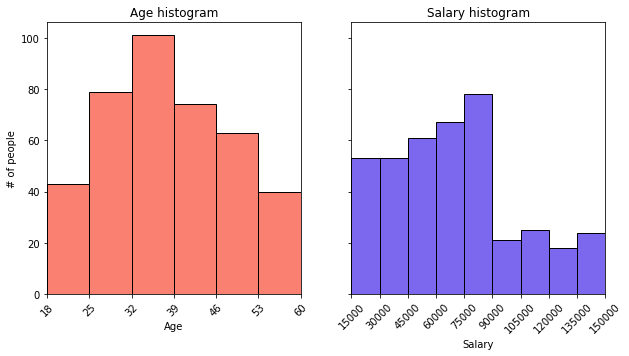

In [16]:
#Начало вашего кода
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,5);
fig,axs = plt.subplots(1,2,sharey=True);
axs[0].hist(x = np_data[:,2],bins = 6 ,edgecolor="k",color="salmon");
axs[0].set_xticks(range(18,61,7));
axs[0].set_xlabel("Age");
axs[0].tick_params(axis='x', labelrotation=45);
axs[0].set_title("Age histogram");
axs[0].set_xlim(18,60);
axs[0].set_ylabel("# of people");
axs[1].hist(x = np_data[:,3],bins = 9,edgecolor="k",color="mediumslateblue");
axs[1].set_xticks(range(15000,150001,15000));
axs[1].set_xlabel("Salary");
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_title("Salary histogram");
axs[1].set_xlim(15000,150000);
#Конец вашего кода

### Ожидаемый результат:

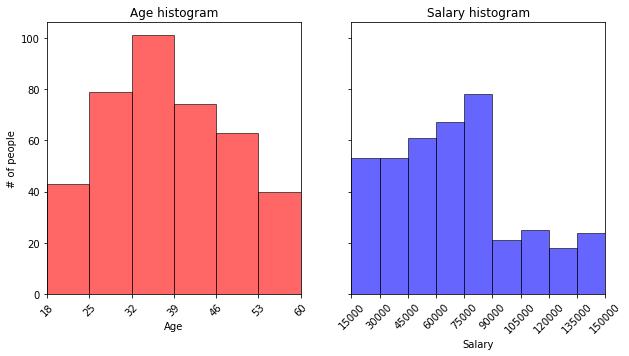


### Шаг 5

Пожалуйста, получите отдельные ```ndarrays``` женщин, которые приобрели, не приобрели, мужчин, которые приобрели, не приобрели продукт, используя логическое индексирование, которое вы изучали в лекциях NumPy. 
Вы должны получить 4 отдельных ```ndarrays```.

In [5]:
#Начало вашего кода
bool_01=np_data[:,1]==0
data1=np_data[bool_01]
bool_02=np_data[:,1]==1
data2=np_data[bool_02]
bool_11=data1[:,4]==1
female_purchased=data1[bool_11]
bool_12=data1[:,4]==0
female_notpurchased=data1[bool_12]
bool_21=data2[:,4]==1
male_purchased=data2[bool_21]
bool_22=data2[:,4]==0
male_notpurchased=data2[bool_22]
#Конец вашего кода

print(female_purchased.shape)
print(female_notpurchased.shape)
print(male_purchased.shape)
print(male_notpurchased.shape)

(77, 5)
(127, 5)
(66, 5)
(130, 5)


### Ожидаемый результат:

```(77, 5)
(127, 5)
(66, 5)
(130, 5)```

### Шаг 5

Используя полученные ```ndarrays``` из предыдущего шага, сделайте следующий график:

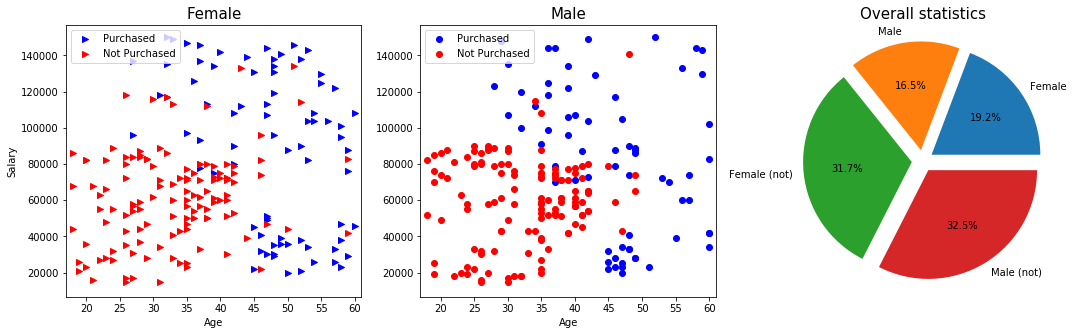


**Подсказка:** 
* установите размер фигуры ```(18,5)```, используя ```plt.rcParams["figure.figsize]```.
* установите размер шрифта ```title``` на ``15``

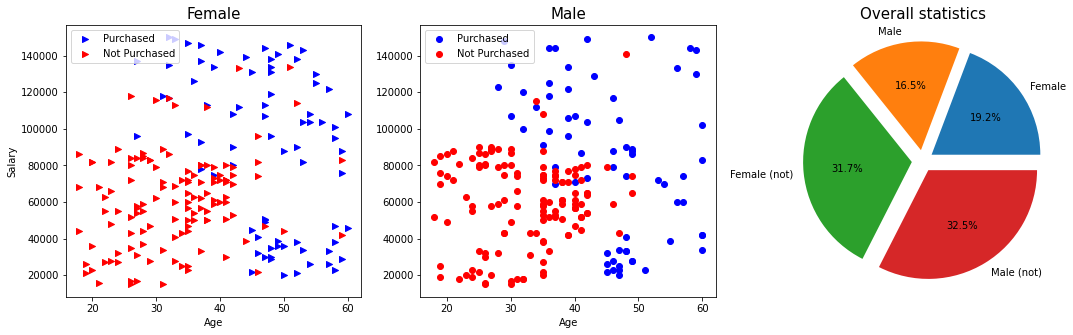

In [6]:
#Начало вашего кода
pie_list=[female_purchased.shape[0]*0.25,male_purchased.shape[0]*0.25,female_notpurchased.shape[0]*0.25,male_notpurchased.shape[0]*0.25]
plt.rcParams["figure.figsize"]=(18,5);
fig,axs=plt.subplots(1,3);

axs[0].scatter(female_purchased[:,2],female_purchased[:,3],label="Purchased",c="b",marker=">");
axs[0].scatter(female_notpurchased[:,2],female_notpurchased[:,3],label="Not Purchased",c="r",marker=">");

axs[0].legend(loc = 'upper left')
axs[0].set_title("Female",fontsize=15);
axs[0].set_xlabel("Age");
axs[0].set_ylabel("Salary");

axs[1].scatter(male_purchased[:,2],male_purchased[:,3],label="Purchased",c="b");
axs[1].scatter(male_notpurchased[:,2],male_notpurchased[:,3],label="Not Purchased",c="r");

axs[1].legend()
axs[1].set_title("Male",fontsize=15);
axs[1].set_xlabel("Age");

distance=0.1
separate = (distance, distance, distance, distance)
axs[2].pie(x=pie_list,labels=["Female","Male","Female (not)","Male (not)"],autopct=lambda x:f"{x:.1f}%",explode=separate);
axs[2].set_title("Overall statistics",fontsize=15);

#Конец вашего кода

# Прекрасная работа!